<a href="https://colab.research.google.com/github/JBsCorner/ESP8266/blob/master/LCJ_practica_penguins_Seaborn_Exercise_Penguins_TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WELCOME TO THE ANTARTICA**

![texto alternativo](https://images.pexels.com/photos/48178/mountains-ice-bergs-antarctica-berg-48178.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260)



*   After finishing IMMUNE Bootcamp you have been actively applying for different DS positions where to put in practice your new skills. Today you finally received an acceptance letter from the **National Biology Center** and are required to joined them as soon as possible.


*   The NBC is currently doing a researh on the **Antartica** penguin population. They need to **identify the amount of penguins belonging to each different species as well as it sex** in order to identify whether global warming is impacting their spread.


*   NBC's main challenge is the great amount of time it takes to train a biologist to **identify different penguin species and their sex**. They believe just comparing different penguin basic characteristics they should be able to recognize each penguin's sex and species.

*   They provide you with a **dataset of the last expedition** where you can see both these characteristics for each penguin as well as the sex and specieces already determined by an expert biologist.

*   They also provide you with some extra documentation on penguins basic knowledge:



![texto alternativo](https://github.com/immune-institute/viz-seaborn-exercise-penguins-todo/blob/main/pictures/penguins1.png?raw=true)


Artwork by @allison_horst


![texto alternativo](https://ecdn.teacherspayteachers.com/thumbitem/Parts-of-a-Penguin-Matching-Cards-Activities-Montesorri-Style-Hands-on-2940033-1486413093/original-2940033-2.jpg)


https://ecdn.teacherspayteachers.com

![texto alternativo](https://github.com/immune-institute/viz-seaborn-exercise-penguins-todo/blob/main/pictures/penguins2.png?raw=true)




Artwork by @allison_horst

![texto alternativo](https://www.zegrahm.com/sites/zeg/files/styles/d2_hero_fp_scale_and_crop_2400x800/public/image509.jpeg?t=1JeDLu&itok=Mt9U-lhp)

https://www.google.com/maps/d/edit?mid=1TXC1N8z-uv3lD2YKpoicrzTaR3Lc7qfR&usp=sharing

##**Setup**

###**EXERCISE 1**: *

Import matplotlib, numpy, pandas and seaborn and set your favourite seaborn style:

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid");

###**EXERCISE 2**: *

Import the penguins built-in dataset:

In [ ]:
df_p = sns.load_dataset('penguins')
df_p.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


##**Initial Understanding**

You may answer these questions using Pandas.

###**EXERCISE 3**: *

Use Pandas to see a sumary of the data (amount of observations, column names, data types...)

In [ ]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


###**EXERCISE 4**: *

Remove empty values before jumping into the data:

In [ ]:
df_p.dropna(inplace=True)

In [ ]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


###**EXERCISE 5**: *

Which are the possible values for each categorical column?


In [ ]:

for column in df_p.columns:
    unique_values = df_p[column].unique()
    print(f"Possible values for {column}: {unique_values}")



Possible values for species: ['Adelie' 'Chinstrap' 'Gentoo']
Possible values for island: ['Torgersen' 'Biscoe' 'Dream']
Possible values for bill_length_mm: [39.1 39.5 40.3 36.7 39.3 38.9 39.2 41.1 38.6 34.6 36.6 38.7 42.5 34.4
 46.  37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2 40.9 36.4 42.2
 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 42.3 40.1 35.  42.  34.5 41.4
 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2 42.1 42.9 35.1
 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7 40.2 35.2 41.5
 38.5 43.1 36.8 37.5 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7 45.2 46.1
 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5 50.6 46.7
 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9 45.5 50.8
 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8 55.8 43.5
 49.6 48.7 43.3 48.4 45.1 46.3 47.8 48.2 47.3 59.6 49.1 42.6 44.4 44.
 45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5 47.4 43.4 52.1
 44.5 49.4 55.9 47.2 41.7 53.4 55.1 48.8 49.9]
Possible values f

What are the main characteristics of each numerical column?

In [ ]:
numerical_columns = df_p.select_dtypes(include='number').columns

for column in numerical_columns:
    print(f"Summary statistics for {column}:")
    print(df_p[column].describe())
    print()

Summary statistics for bill_length_mm:
count    333.000000
mean      43.992793
std        5.468668
min       32.100000
25%       39.500000
50%       44.500000
75%       48.600000
max       59.600000
Name: bill_length_mm, dtype: float64

Summary statistics for bill_depth_mm:
count    333.000000
mean      17.164865
std        1.969235
min       13.100000
25%       15.600000
50%       17.300000
75%       18.700000
max       21.500000
Name: bill_depth_mm, dtype: float64

Summary statistics for flipper_length_mm:
count    333.000000
mean     200.966967
std       14.015765
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64

Summary statistics for body_mass_g:
count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64



In [ ]:
print(df_p[column].describe())

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64


##**Basic Plotting**

On this section you will have to answer the questions by drawing plots that show the answer:

###**EXERCISE 6**: *

How many penguins belong to each species group?

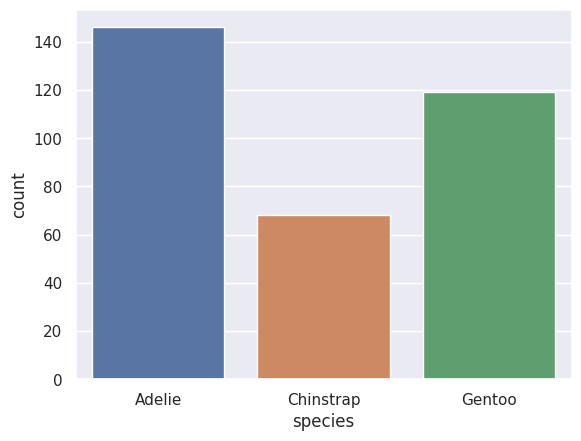

In [ ]:
sns.countplot(x='species',data=df_p);

How many penguins belong to each species group per sex?

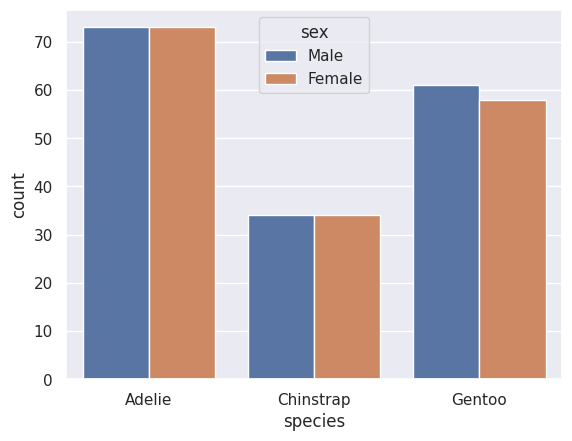

In [ ]:
sns.countplot(x='species',data=df_p, hue='sex');

How many penguins belong to each species group per island?

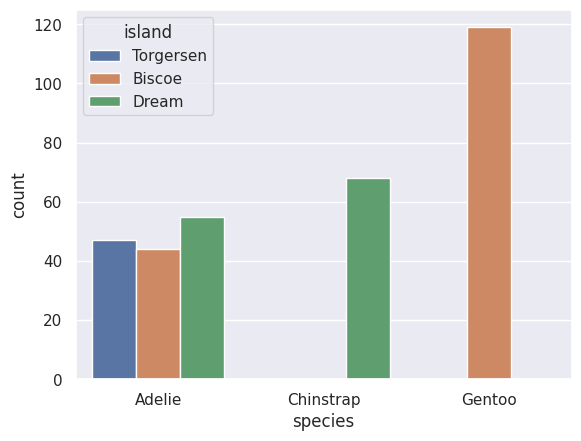

In [ ]:
sns.countplot(x='species',data=df_p, hue='island');

Write down your conclusions:

- Adeile es la especie más comun de las estudiadas con mas de 140 pinguinos frente a Chinstrap (60) y Gento (120)
- Hay un balance equilibrado entre sexo femenino y masculino entre especies. Gentoo es la unica que identifica un pequeno porcentaje mayor de pinguinos de sexo masculino
- De acuerdo a la grafica 3, la especie Adelie se encuentra mas distribuida por las islas. Sin embargo, en la isla Dream solo podemos encontrar la especie Chinstrap y en la is la Biscoe, solo podemos encontrar la especie Gentoo.

*WRITE HERE*

###**EXERCISE 7**: *

What is the average weight of each species?

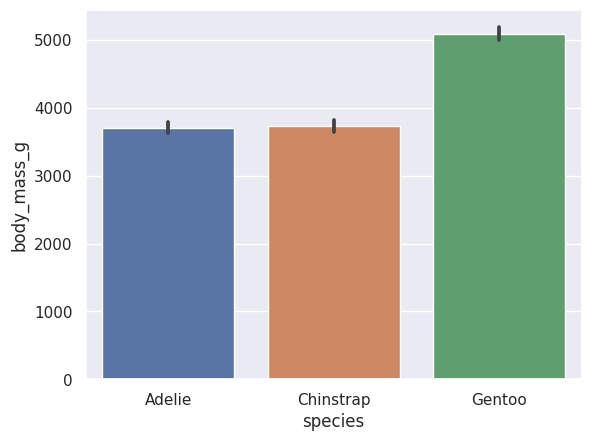

In [ ]:
sns.barplot(x='species',y='body_mass_g',data=df_p);

What is the average weight of each species per sex?

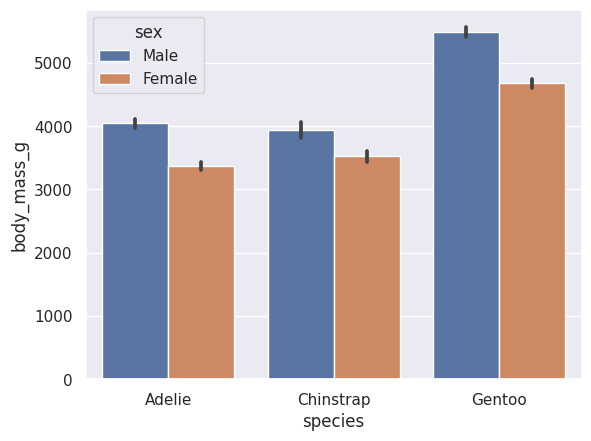

In [ ]:
sns.barplot(x='species',y='body_mass_g',data=df_p, hue='sex');

Write down your conclusions:

- La especie Gentoo es mas pesada que las especies Adelie o Chinstrap, por lo tanto, si relaccionamos peso con tamaño, los pinguinos Gentoo son mas grandes en mas de un 20%.
- Generalmente el pinguino macho es mas grande que el pinguino hembra en todas las especies y parece que con mayor diferencia en el pinguino Gentoo, lo que hace incrementar la media de peso que vemos en el grafico 1

##**Statistical plotting**

###**EXERCISE 8**: **

Build a pairplot to overview feature relationships and try to identify visually any possible pattern


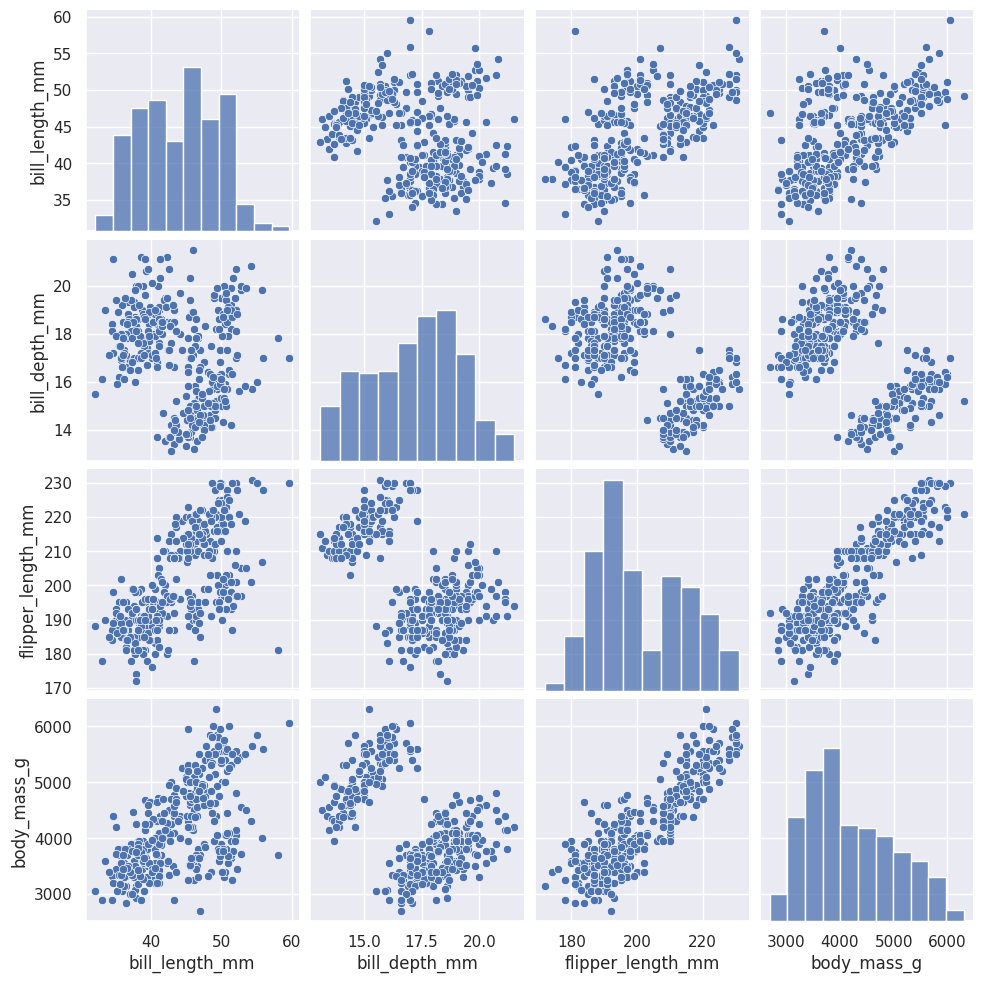

In [ ]:
sns.pairplot(df_p);

Add an extra dimension to the plot by comparing species.

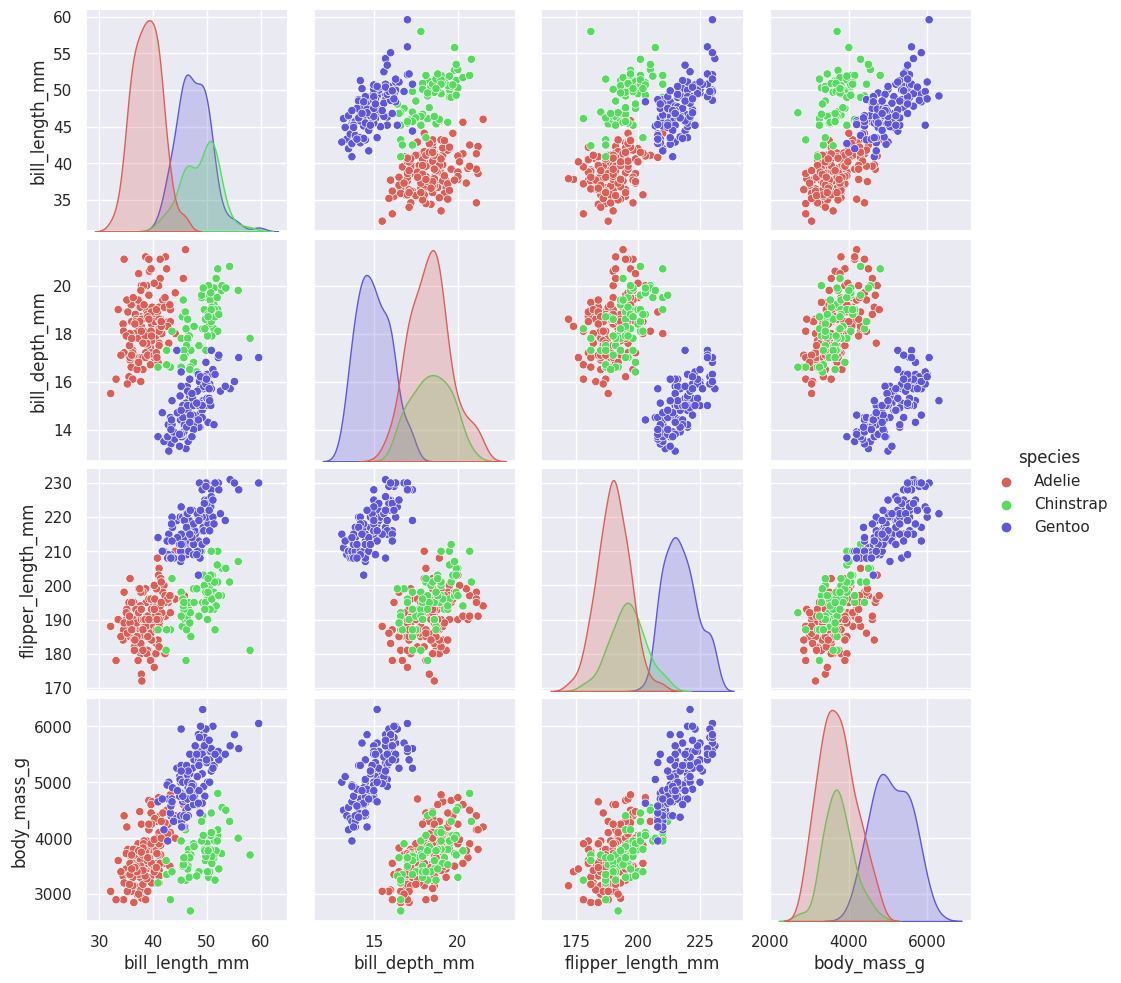

In [ ]:
sns.pairplot(df_p, hue='species', palette='hls');

Write down your conclusions:

Anadiendo la nueva dimension comparando especies, podemos entender mucho mejor los datos.
- Generalmente podemos concluir que la especie Gentoo se desmarca bastante de las otras dos especies, pero tambien, que hay en algunas caracteristicas, como por ejemplo el pico, donde todas las especies se podrian diferenciar facilmente.
- Gentoo, a parte de pesar mas, tambien tiene mayor tambien mayores aletas pero menor profundidad de pico en general.
- Diria que Adelie se caracteriza por su corto y ancho pico y por tender a tener unas aletas mas cortas que el resto de especies, aunque en su media de longitud de aletas, comprende a Chinstrap.
- Chinstrap es el pinguino mas variopinto, teniendo una longitud y profundidad de pico altas pero encontrandose entre los pinguinos mas pequenos con aletas bastante mas cortas que Gentoo.

Can you suggest any further similar plotting?



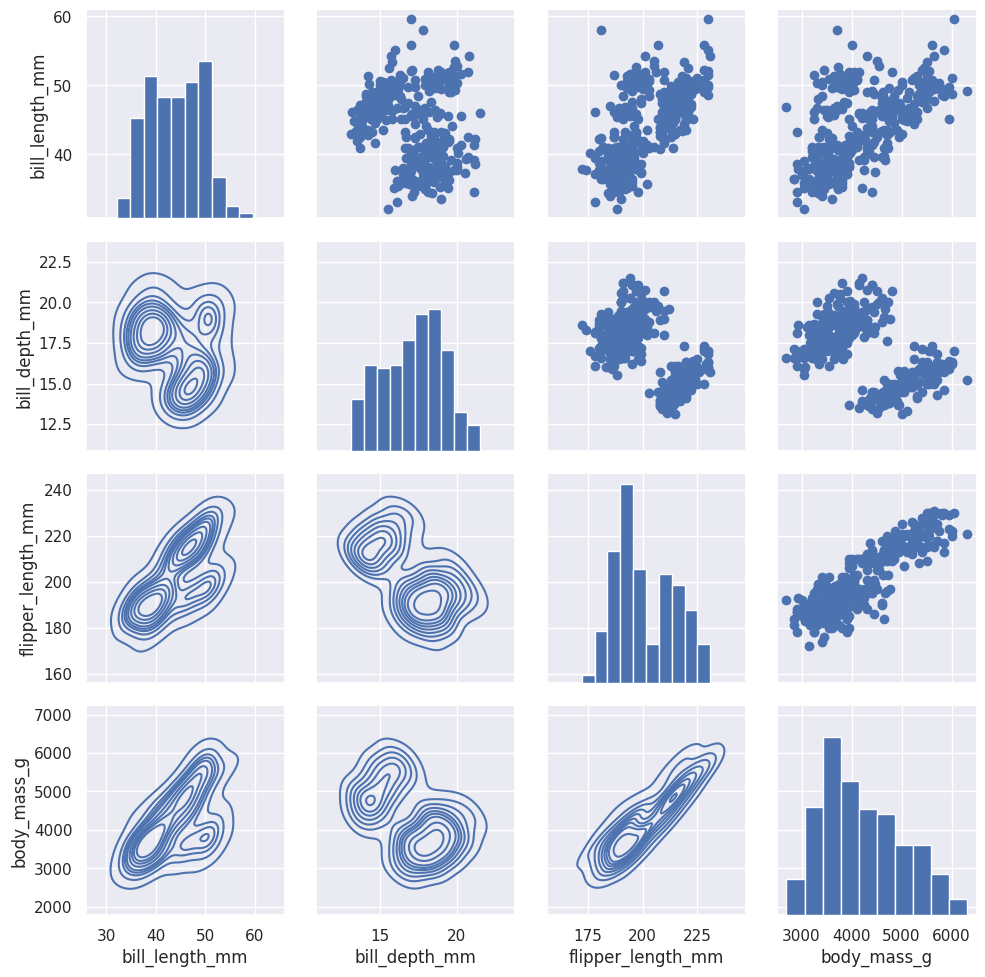

In [ ]:
g = sns.PairGrid(df_p)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot);

Write down your conclusions:

*WRITE HERE*

###**EXERCISE 9**: **

Compare de distribution of body mass among penguin species


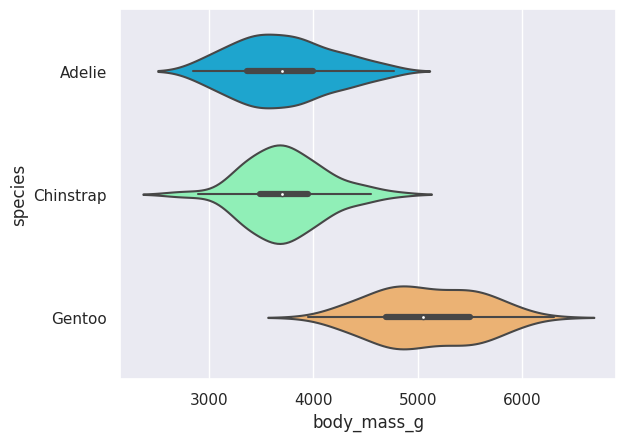

In [ ]:
sns.violinplot(x="body_mass_g", y="species", data=df_p,palette='rainbow');

Now take also into account species sex

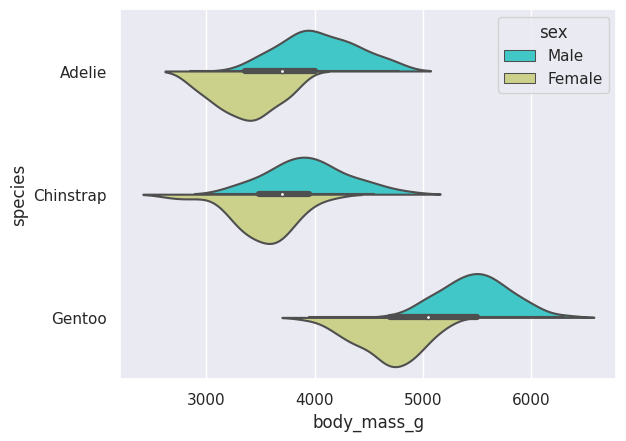

In [ ]:
sns.violinplot(x="body_mass_g", y="species", data=df_p,palette='rainbow', hue='sex', split=True);

Write down your conclusions:

A parte de las conclusiones anteriores, en estos graficos podemos denotar de manera mas clara la diferencia de peso entre macho y hembra en todas las especies, pero sobre todo, en Gentoo, donde la mayoria de hembras pesan de media lo que la minoria de machos pesan.

##**Report summary**

###**EXERCISE 10**: **

What would be your feedback to the biologist lead? Are these characteristics enough to determine penguin species and sex?

Did we miss any piece of information we could still study?

Considero que no faltaría ninguna caracteristica dentro de las 4 estudiadas en los graficos anteriores para determinar cada especie observando los mismos.
- Gentoo podria diferenciarse solo con la curva de peso
- Diferenciaria Adelie con tan solo la curva de longitud de pico
- Y diferenciaria a Chinstrap contrastando, por ejemplo longitud vs profundidad de pico.


##**References**

https://github.com/allisonhorst/palmerpenguins